In [1]:
# Import libraries  
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting 
import seaborn as sns # Statistical Visualization 
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import Counter

# Data visualisation & Preprocessing

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

* ***There's no missing values in our dataset***

In [4]:
Num_Vals = {}
for column in df.columns:
    Num_unique_values = len(df[column].unique().tolist())
    Num_Vals[column] = Num_unique_values

df_Num_Vals = pd.DataFrame(list(Num_Vals.items()), columns=['Attribute', '#Unique_values'])

df_Num_Vals

,Attribute,#Unique_values
0,Age,43
1,Attrition,2
2,BusinessTravel,3
3,DailyRate,886
4,Department,3
5,DistanceFromHome,29
6,Education,5
7,EducationField,6
8,EmployeeCount,1
9,EmployeeNumber,1470


* ***EmployeeNumber => contains only distinct values***

* ***StandardHours, EmployeeCount, Over18 => contains only ONE value***

**So they will be deleted**

In [5]:
df.drop(['EmployeeNumber','Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)

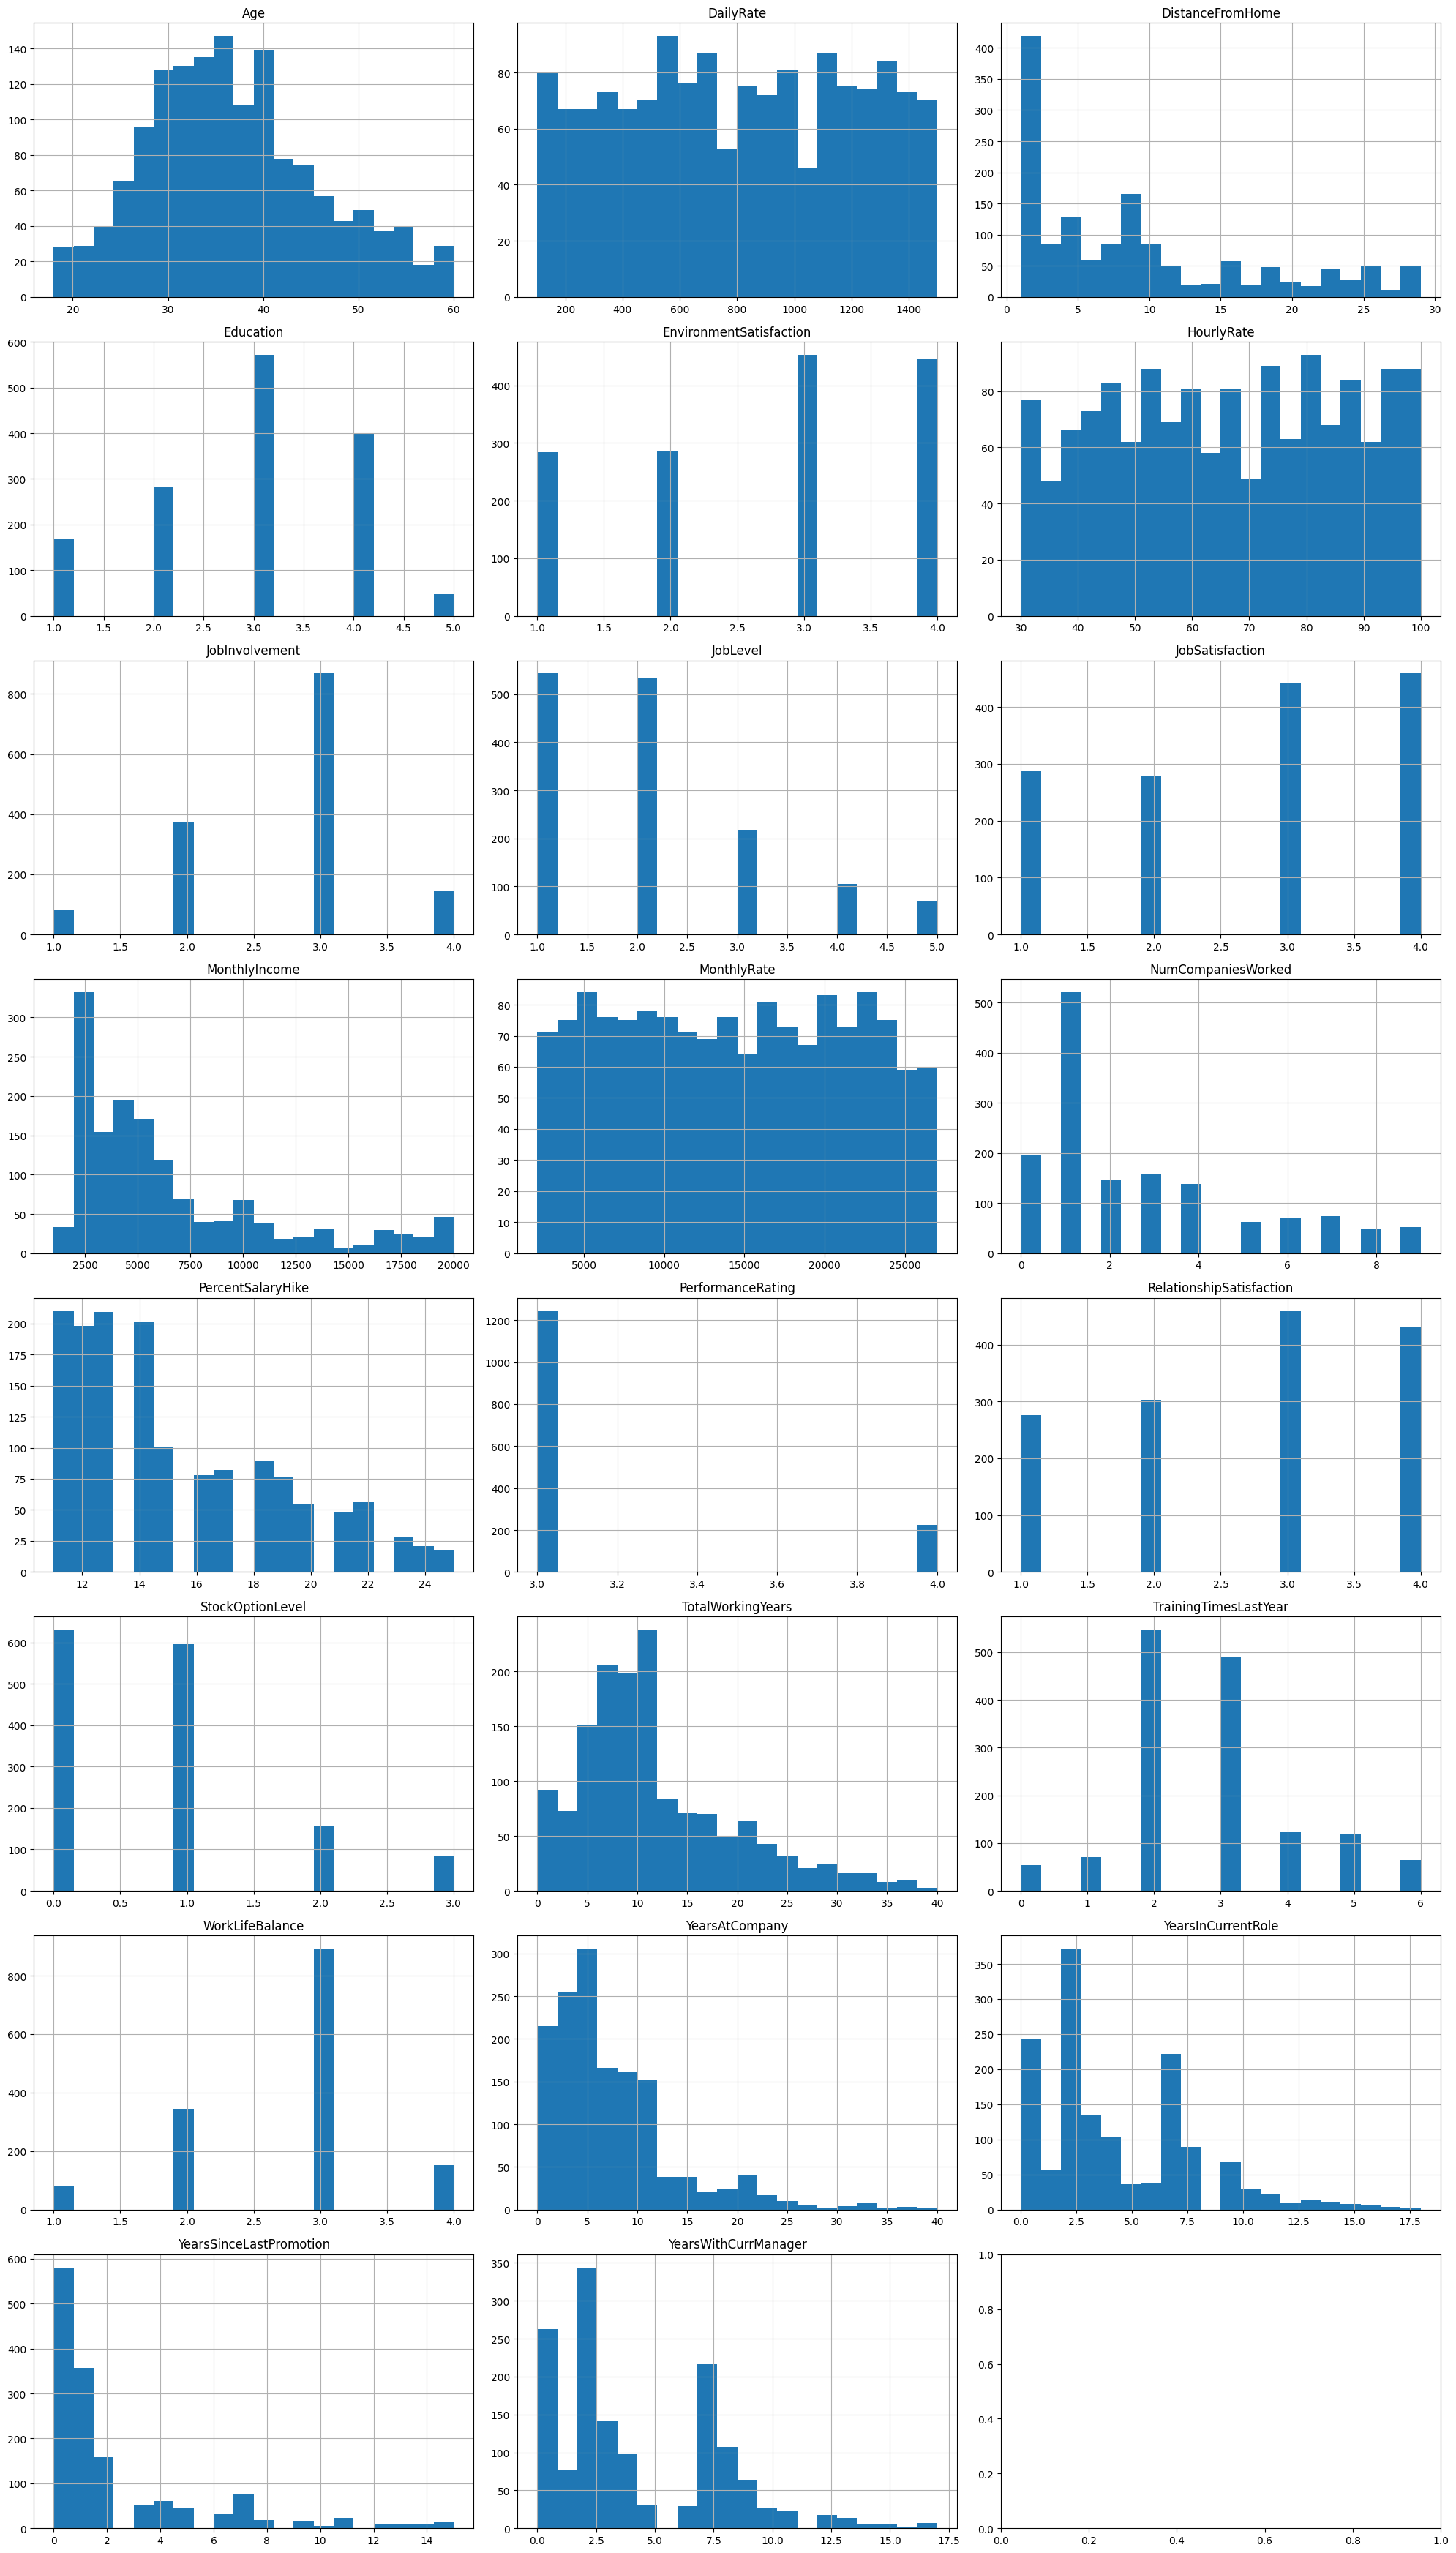

In [6]:
num_rows = 8
num_cols = 3
numerical_cols = df.select_dtypes(include=np.number).columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 35))

# Flatten the 2D array of subplots to a 1D array
axes = axes.flatten()

# Plot histograms for all columns
for i, column in enumerate(numerical_cols):
    df[column].hist(ax=axes[i], bins=20)
    axes[i].set_title(column)

# Adjust layout to prevent overlapping subplots
plt.tight_layout()
plt.show()

In [7]:
df.drop(['PerformanceRating'],axis=1,inplace=True)

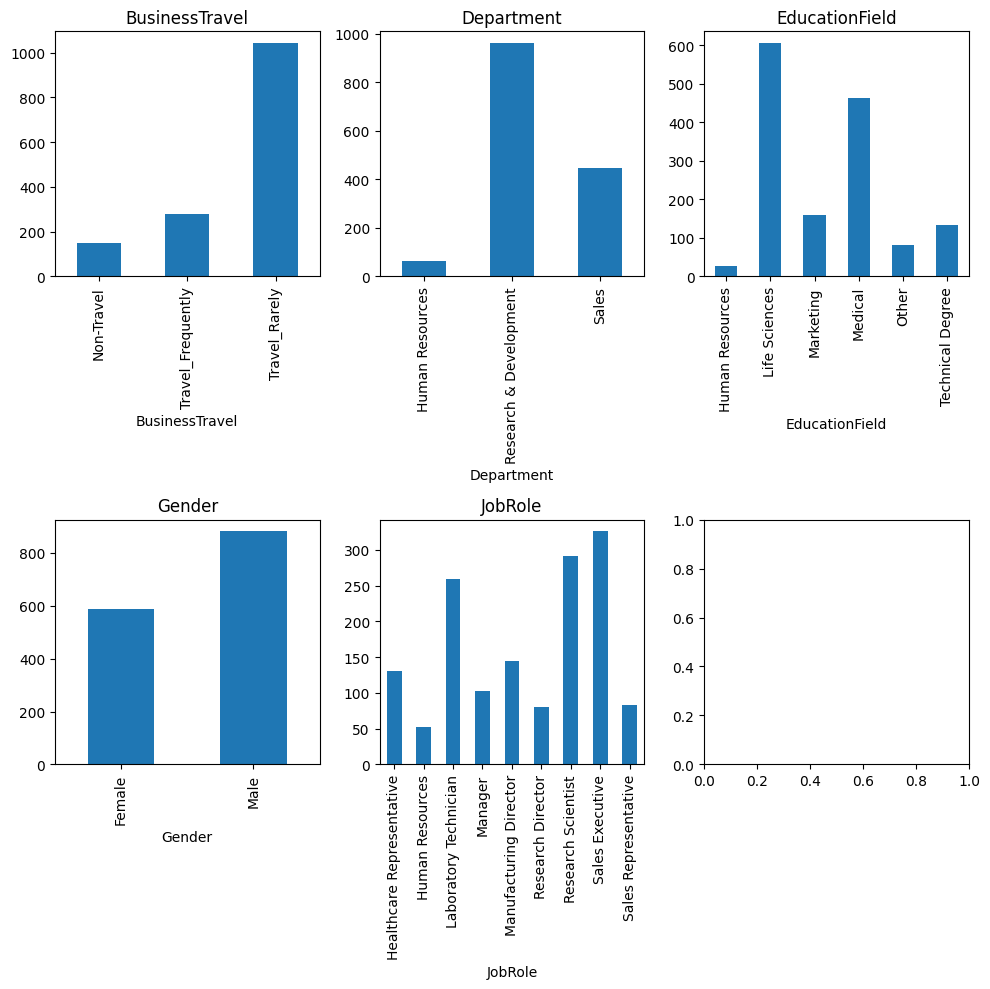

In [8]:
Categorical_Cols = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole"]
# Determine the number of rows and columns for subplots
num_rows = 2
num_cols =  3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Flatten the 2D array of subplots to a 1D array
axes = axes.flatten()

# Plot bar charts for all columns
for i, column in enumerate(Categorical_Cols):
    df[column].value_counts().sort_index().plot(kind='bar', ax=axes[i])
    axes[i].set_title(column)

# Adjust layout to prevent overlapping subplots
plt.tight_layout()
plt.show()

In [9]:
df.to_csv('AttritionData_PBI.csv')

In [10]:
#Encoding label & ordinal Data
df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])
df['BusinessTravel'] = LabelEncoder().fit_transform(df['BusinessTravel'])

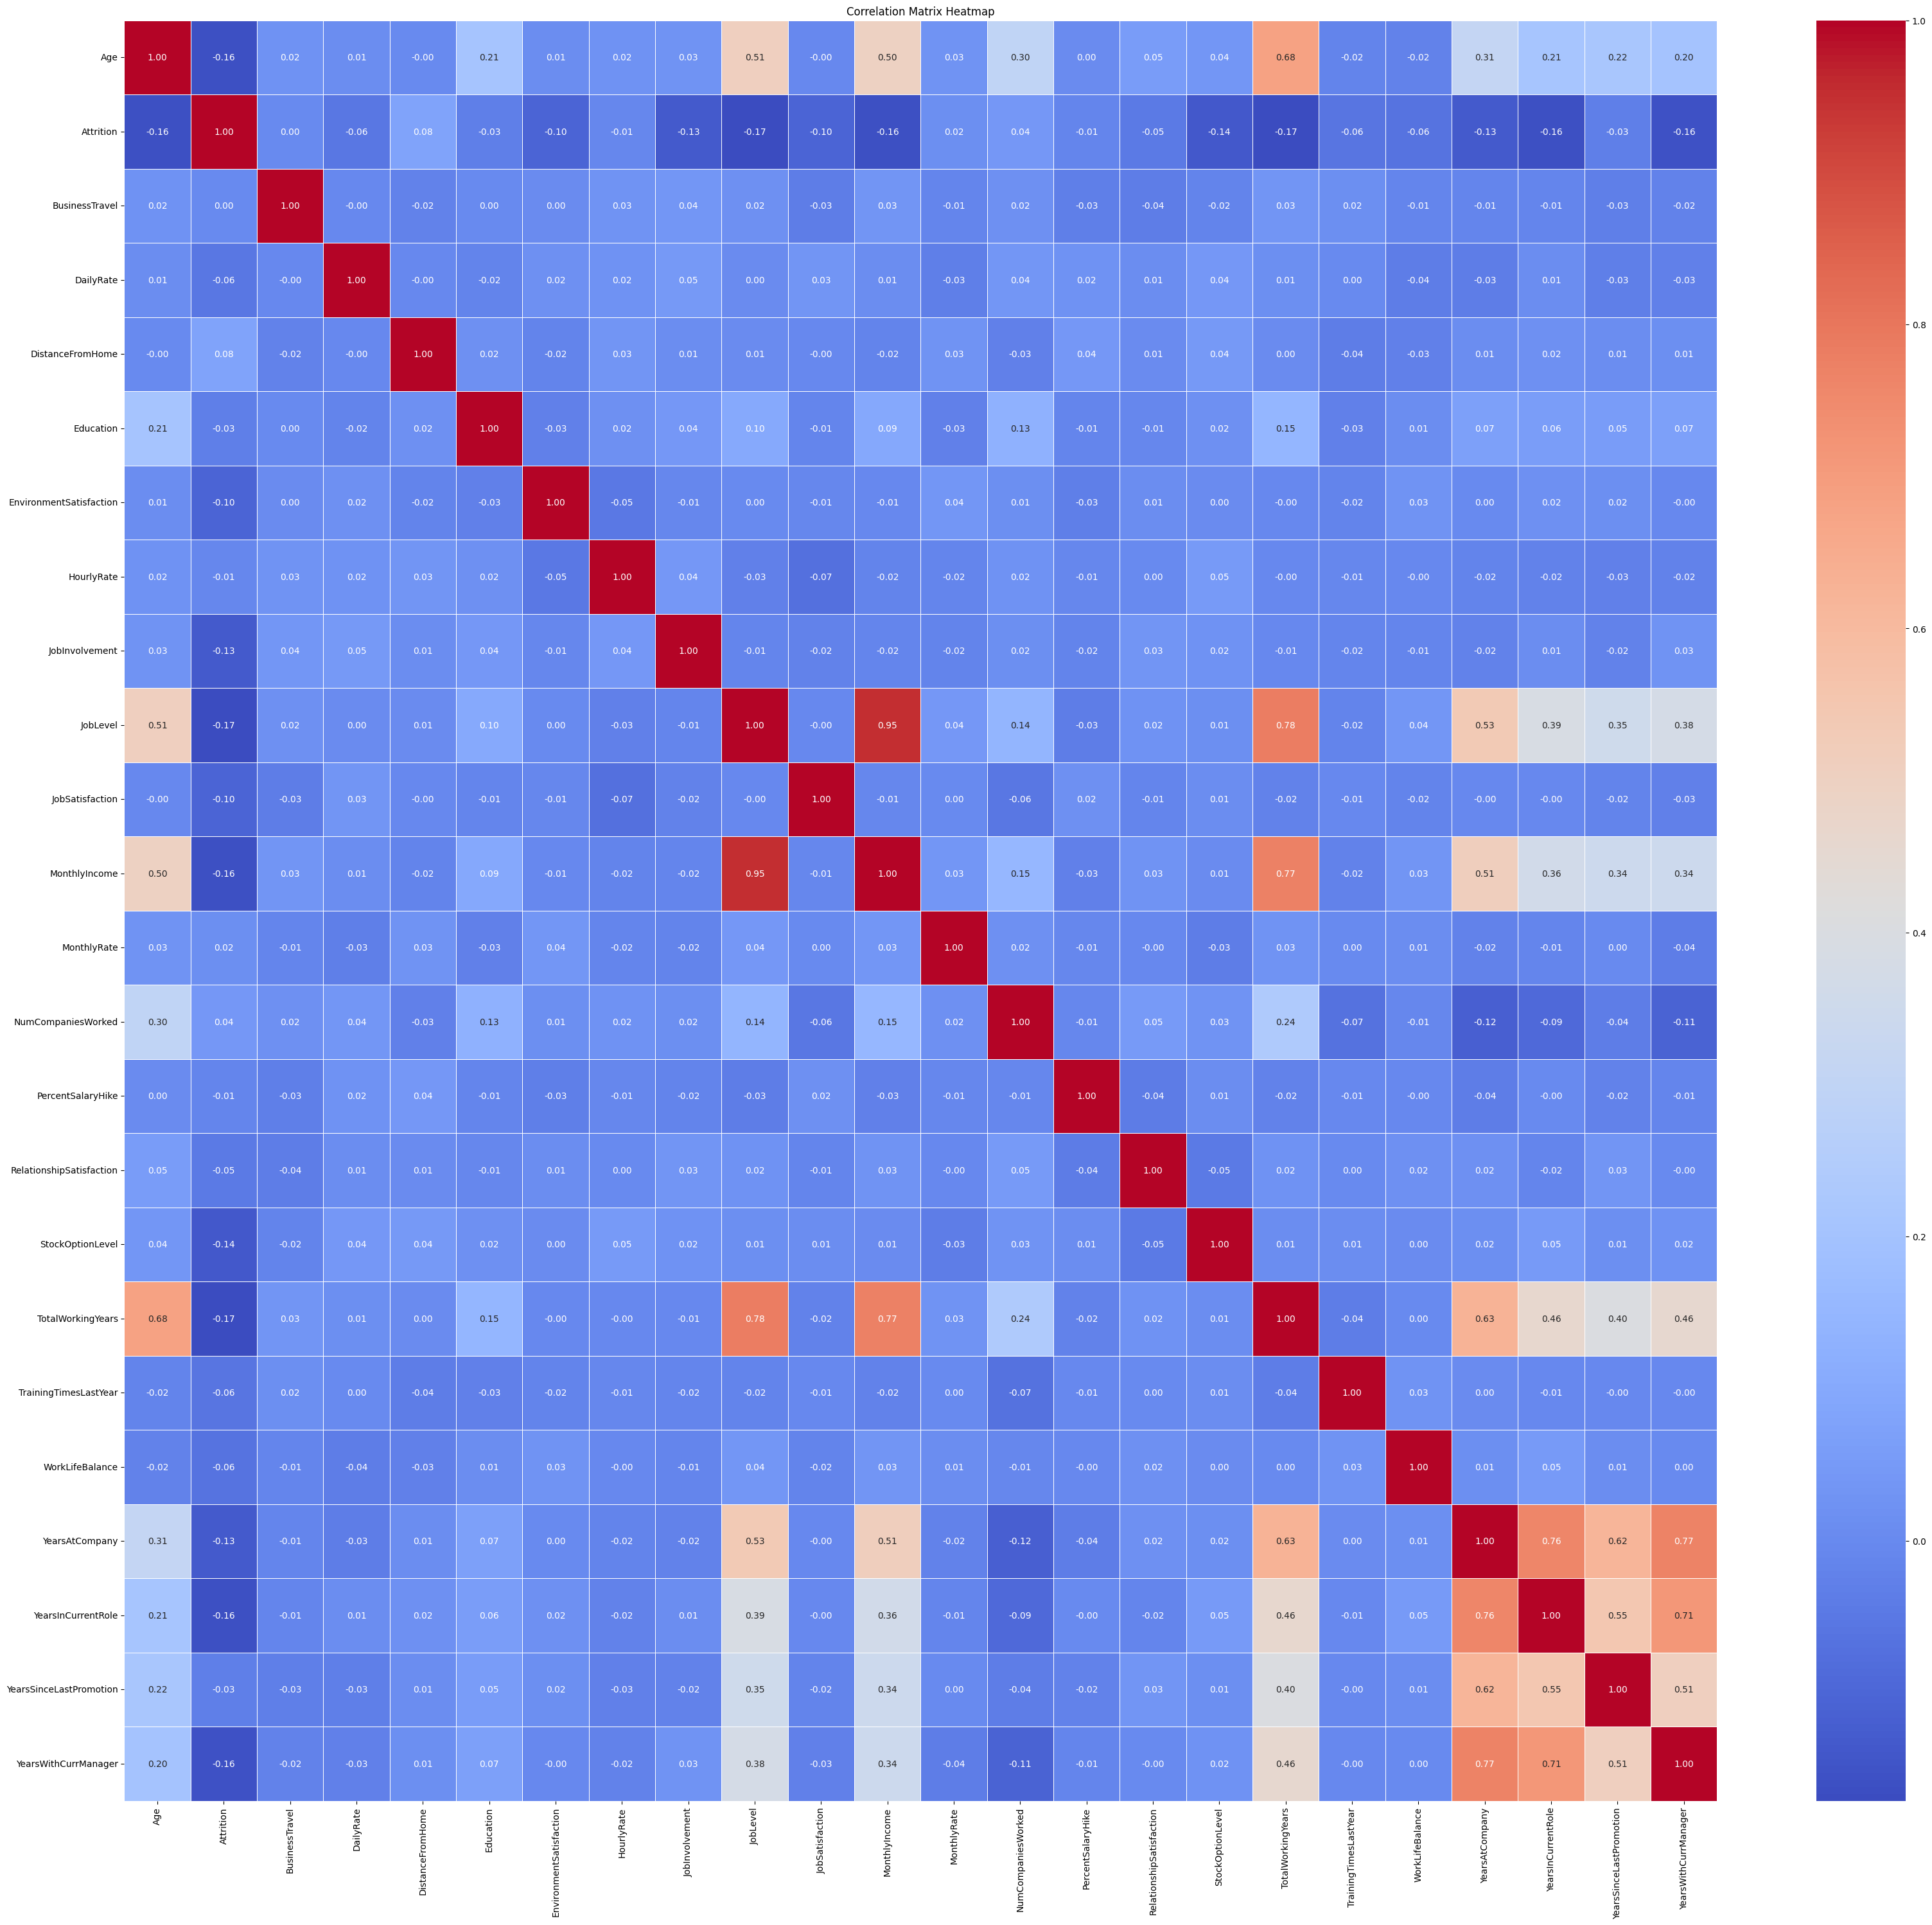

In [11]:
# Extract numerical columns
numeric_cols = df.select_dtypes(include='number').columns

# Compute correlation matrix for numerical columns
correlation_matrix = df[numeric_cols].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(40, 36))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
#High corr between MonthlyIncome and JobLevel 
df.drop(['JobLevel'],axis=1,inplace=True)

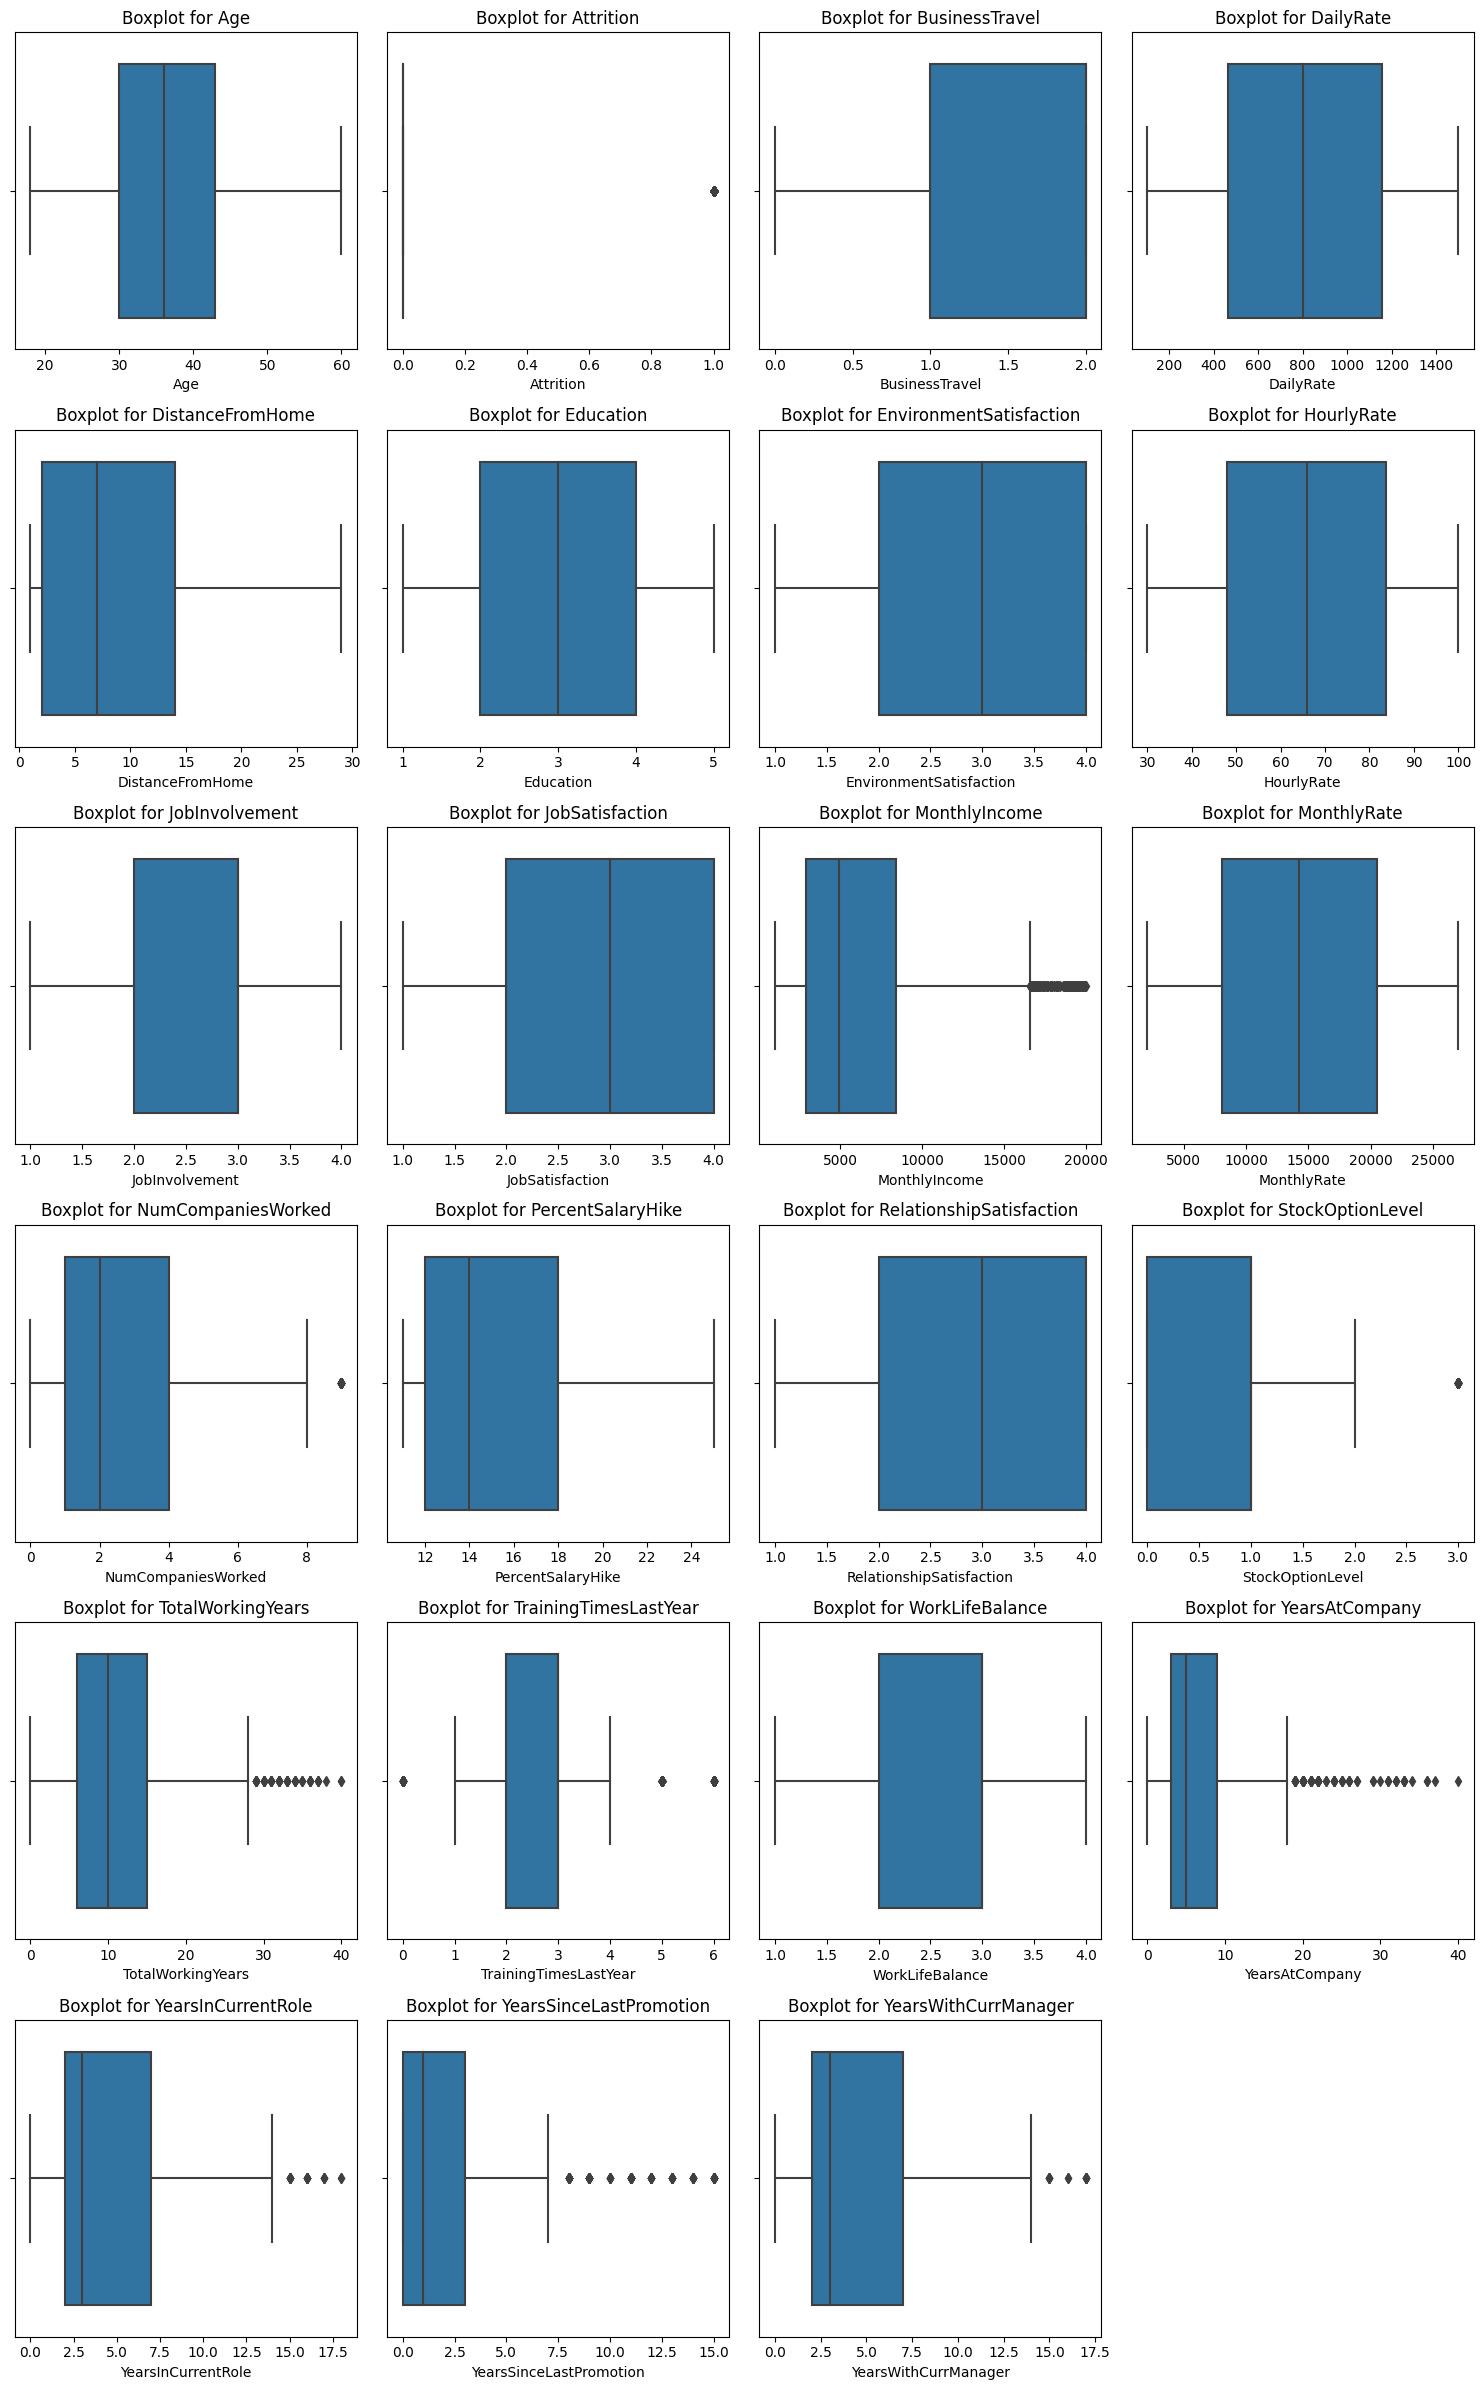

In [13]:
plots_per_line = 4
numeric_columns = df.select_dtypes(include=['number']).columns
num_rows = (len(numeric_columns) + plots_per_line - 1) // plots_per_line
# Create a grid of boxplots
fig, axes = plt.subplots(num_rows, plots_per_line, figsize=(15, 4*num_rows))
# Flatten the axes array for easier iteration
axes = axes.flatten()
# Create individual boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i], orient='h')
    axes[i].set_title(f'Boxplot for {column}')

# Hide empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [14]:
#Get rid of outliers

def calculateOutliers(col):
    summary_stats = df[col].describe(percentiles=[.25, .5, .75])
    q1 = summary_stats.loc['25%']
    q3 = summary_stats.loc['75%']
    q2 = summary_stats.loc['50%']
    IQR = q3-q1
    min_q0 = q1 - 1.5*IQR
    max_q4 = q3 + 1.5*IQR
    outliers = (df[col] > max_q4) | (df[col] < min_q0)
    return outliers,q2


Columns_With_Outliers = ["MonthlyIncome","NumCompaniesWorked","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear",
          "YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]

for col in Columns_With_Outliers :  
    outliers1,mediane = calculateOutliers(col)
    df.loc[outliers1, col] = mediane
    outliers2,mediane = calculateOutliers(col)
    df = df[~outliers2]


In [15]:
#Encoding categorical Data
one_hot_encoded_data = pd.get_dummies(df, columns = ['Department','EducationField','OverTime','Gender','JobRole','MaritalStatus']) 
df = one_hot_encoded_data.astype(int)

Counter({0: 967, 1: 211})


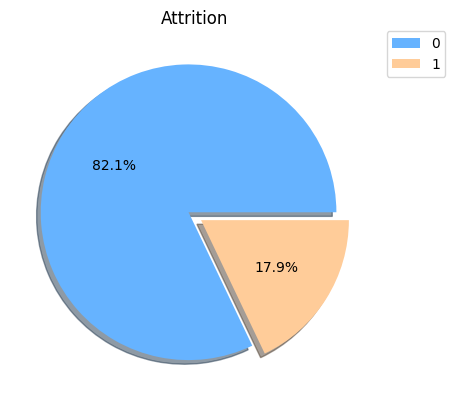

In [16]:
y = df['Attrition']
print(Counter(y))

colors = ['#66b3ff','#ffcc99']
data = y.value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors=colors, legend=True, title='Attrition', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

In [17]:
df = df.drop('Attrition', axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,OverTime_No,OverTime_Yes,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.590866,0.594554,0.747516,-1.023533,-0.882147,-0.670071,1.375302,0.372160,1.155656,0.498129,0.733612,2.535012,-1.154575,-1.546714,-1.013782,-0.102938,0.534278,-2.499119,0.290726,0.184684,-0.975348,0.498263,-0.210538,-1.34840,1.483606,-0.13142,1.193260,-0.353722,-0.674033,-0.245573,-0.314453,-1.589637,1.589637,1.271919,-1.271919,-0.306234,-0.196979,-0.492561,-0.199293,-0.320930,-0.156038,-0.545304,1.816389,-0.262613,-0.536127,-0.898192,1.424176
1,1.484515,-0.895626,-1.309293,-0.150183,-1.858811,0.254219,-0.243773,-1.024033,-0.654667,0.142540,1.494301,-0.631257,2.163391,1.206982,0.501745,0.316651,0.534278,0.363265,1.493448,1.201307,0.488295,1.153712,-0.210538,0.74162,-0.674033,-0.13142,1.193260,-0.353722,-0.674033,-0.245573,-0.314453,0.629074,-0.629074,-0.786214,0.786214,-0.306234,-0.196979,-0.492561,-0.199293,-0.320930,-0.156038,1.833838,-0.550543,-0.262613,-0.536127,1.113348,-0.702160
2,0.144042,0.594554,1.424789,-0.898769,-0.882147,1.178509,1.277176,-1.024033,0.250495,-1.110057,-1.660428,1.630364,-0.048587,-0.628815,-1.013782,-0.312733,0.534278,0.363265,-1.513357,-1.170814,-0.975348,-1.140358,-0.210538,0.74162,-0.674033,-0.13142,-0.838041,-0.353722,-0.674033,4.072111,-0.314453,-1.589637,1.589637,-0.786214,0.786214,-0.306234,-0.196979,2.030207,-0.199293,-0.320930,-0.156038,-0.545304,-0.550543,-0.262613,-0.536127,-0.898192,1.424176
3,-0.973019,0.594554,-0.529555,-0.898769,-1.858811,-1.594362,-1.274094,0.372160,-0.654667,-0.542268,0.334629,-0.631257,-0.878078,1.206982,0.501745,-0.522527,0.534278,0.363265,-0.911996,-0.493065,1.951938,-0.484910,-0.210538,0.74162,-0.674033,-0.13142,-0.838041,-0.353722,1.483606,-0.245573,-0.314453,0.629074,-0.629074,-0.786214,0.786214,-0.306234,-0.196979,2.030207,-0.199293,-0.320930,-0.156038,-0.545304,-0.550543,-0.262613,-0.536127,1.113348,-0.702160
4,2.601576,0.594554,1.302330,-0.774005,0.094516,0.254219,0.737484,1.768354,-1.559828,-0.871075,-0.599835,0.725715,1.333899,-1.546714,0.501745,0.736239,0.534278,-1.067927,-1.212677,-1.170814,-0.975348,-1.140358,-0.210538,0.74162,-0.674033,-0.13142,-0.838041,-0.353722,1.483606,-0.245573,-0.314453,-1.589637,1.589637,1.271919,-1.271919,-0.306234,-0.196979,2.030207,-0.199293,-0.320930,-0.156038,-0.545304,-0.550543,-0.262613,-0.536127,1.113348,-0.702160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,0.032336,-0.895626,0.202699,1.721282,-0.882147,0.254219,-1.225031,1.768354,1.155656,-0.911866,-0.273866,0.725715,0.504408,0.289083,0.501745,1.785212,0.534278,0.363265,-0.009955,-0.493065,-0.975348,-0.157185,-0.210538,0.74162,-0.674033,-0.13142,-0.838041,-0.353722,1.483606,-0.245573,-0.314453,0.629074,-0.629074,-0.786214,0.786214,-0.306234,-0.196979,2.030207,-0.199293,-0.320930,-0.156038,-0.545304,-0.550543,-0.262613,-0.536127,1.113348,-0.702160
1174,0.367454,0.594554,-0.474573,-0.399712,-1.858811,1.178509,-1.175968,-1.024033,-1.559828,2.145458,1.010813,0.725715,-0.048587,-

In [19]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score

# Imbalanced Data

In [20]:
results_table = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC Score','F1_score'])

models = [('Logistic Regression', LogisticRegression()),
          ('SVC', SVC(probability=True)),  
          ('NaiveBayes', BernoulliNB()),
          ('DecisionTree', DecisionTreeClassifier()),
          ('RandomForestClassifier', RandomForestClassifier())]
for model_name, model in models:
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    f1 = f1_score(y_test,y_pred)
    
    results_table = pd.concat([results_table, pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'ROC AUC Score': [roc_auc],
        'F1_score': [f1]        
    })], ignore_index=True)

results_table

,Model,Accuracy,ROC AUC Score,F1_score
0,Logistic Regression,0.851695,0.837812,0.426230
1,SVC,0.834746,0.789131,0.204082
2,NaiveBayes,0.830508,0.819014,0.500000
3,DecisionTree,0.783898,0.578684,0.301370
4,RandomForestClassifier,0.817797,0.746174,0.156863


# SMOTE

In [21]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
data_resampled, y_resampled = oversample.fit_resample(scaled_data, y)
print(Counter(y_resampled))

Counter({1: 967, 0: 967})


In [22]:
results_table = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC Score'])

models = [('Logistic Regression', LogisticRegression()),
          ('SVC', SVC(probability=True)),  
          ('NaiveBayes', BernoulliNB()),
          ('DecisionTree', DecisionTreeClassifier()),
          ('RandomForestClassifier', RandomForestClassifier())]

for model_name, model in models:
    X_train, X_test, y_train, y_test = train_test_split(data_resampled, y_resampled, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    f1 = f1_score(y_test,y_pred)

    results_table = pd.concat([results_table, pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'ROC AUC Score': [roc_auc],
        'F1_score': [f1]        
    })], ignore_index=True)

results_table

,Model,Accuracy,ROC AUC Score,F1_score
0,Logistic Regression,0.793282,0.860936,0.805825
1,SVC,0.917313,0.977754,0.922330
2,NaiveBayes,0.775194,0.843262,0.790361
3,DecisionTree,0.865633,0.864439,0.873786
4,RandomForestClassifier,0.919897,0.973890,0.920716


Applying SMOTE has improved the models performances, especially in terms of F1 scores.

# SMOTE with random undersampling

In [23]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
data_resampled_2, y_resampled_2 = pipeline.fit_resample(scaled_data, y)
print(Counter(y_resampled_2))

Counter({0: 967, 1: 967})


In [24]:
results_table = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC Score'])

models = [('Logistic Regression', LogisticRegression()),
          ('SVC', SVC(probability=True)),  
          ('NaiveBayes', BernoulliNB()),
          ('DecisionTree', DecisionTreeClassifier()),
          ('RandomForestClassifier', RandomForestClassifier())]
for model_name, model in models:
    X_train, X_test, y_train, y_test = train_test_split(data_resampled_2, y_resampled_2, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    f1 = f1_score(y_test,y_pred)

    results_table = pd.concat([results_table, pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'ROC AUC Score': [roc_auc],
        'F1_score': [f1]        
    })], ignore_index=True)

results_table

,Model,Accuracy,ROC AUC Score,F1_score
0,Logistic Regression,0.788114,0.857307,0.793970
1,SVC,0.906977,0.964120,0.913043
2,NaiveBayes,0.739018,0.824018,0.750617
3,DecisionTree,0.844961,0.843788,0.856459
4,RandomForestClassifier,0.932817,0.977505,0.933673
